In [90]:
L,N,Ns,Nn,PBC=1,3,10,3,0
Lambda,omega,gdd=20000,40,0
gs=[0,300]
sigma,maxRange,maxOcc=0.1,8,3

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt,pi,exp
from math import factorial

def H(k,x):
    if k==0:
        return 1
    if k==1:
        return 2*x
    if k==2:
        return (2*x)**2-2
    if k==3:
        return (2*x)**3-6*(2*x)
        
def phiTG(k,x):
    return omega**(0.25)/(sqrt(sqrt(pi)*2**(k)*factorial(k)))*exp(-omega*x**2/2)*H(k,sqrt(omega)*x)

def getRhoTG(x):
    out = 0.0
    for k in range(0,N):
        out += phiTG(k,x)**2
    return out/factorial(N)

def getRhoFree(x):
    return phiTG(0,x)**2
    

rhoTGs = []
rhoFrees = []
for x in xs:
    rhoTGs.append(getRhoTG(x))
    rhoFrees.append(getRhoFree(x))

G1corr = {}

for j in range(len(gs)):
    data = np.loadtxt("./G1correlations/L%.3f_N%i_Ns%i_Nn%i_PBC%i_Lambda%.2f_omega%.6f_g%.6f_gdd%.6f_sigma%.6f_maxRange%i_maxOcc%i_DMRG"%( L,N,Ns,Nn,PBC,Lambda,omega,gs[j],gdd,sigma,maxRange,maxOcc))
    G1corr[gs[j]] = np.zeros((61,61),dtype=float)
    ir = 0
    for i in range(61):
        for ip in range(61):
            G1corr[gs[j]][i,ip] = float(data[ir,2])
            ir+=1
        

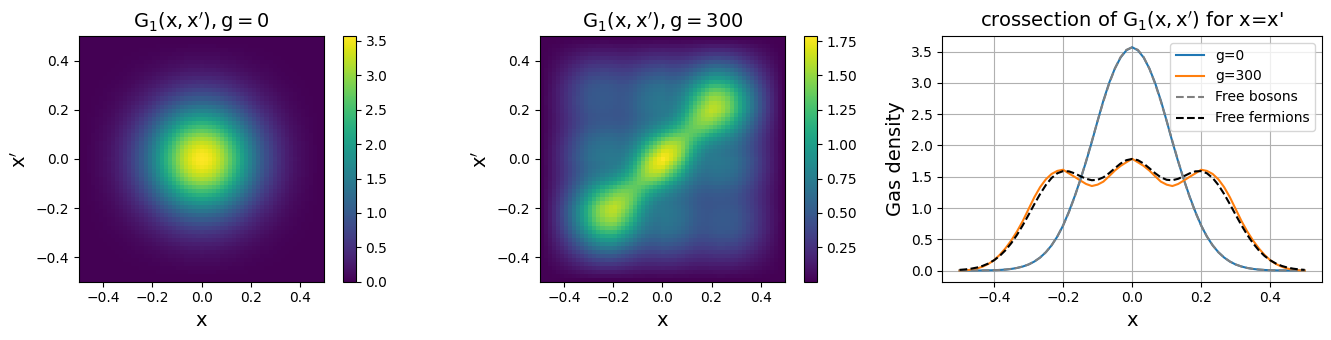

In [92]:
fig,ax = plt.subplots(1,1+len(gs),figsize=[6+4*len(gs),3.5])
xs = np.linspace(-L/2,L/2,61)

for j in range(len(gs)):
    G1 = ax[j].imshow(G1corr[gs[j]],origin='lower',extent=[-L/2,L/2,-L/2,L/2],interpolation='none')
    plt.colorbar(G1)
    ax[j].set_title(r"$\rm{G_1(x,x'),g=%.0f}$"%(gs[j]),fontsize=14)
    ax[j].set_ylabel(r"$\rm{x'}$",fontsize=14)
    ax[j].set_xlabel(r"$\rm{x}$",fontsize=14)
    ax[-1].plot(xs,[G1corr[gs[j]][i,i] for i in range(61)],label='g=%.0f'%(gs[j]))

    
ax[-1].plot(xs,rhoFrees,'--',c='gray',label='Free bosons')
ax[-1].plot(xs,[x*2 for x in rhoTGs],'--',c='black',label='Free fermions')

ax[-1].set_ylabel('Gas density',fontsize=14)
ax[-1].grid()
ax[-1].legend()
ax[-1].set_title(r"crossection of $\rm{G_1(x,x')}$ for x=x'",fontsize=14)
ax[-1].set_xlabel(r"$\rm{x}$",fontsize=14)

plt.tight_layout()
plt.show()